In [1]:
#imports
import pandas as pd
import pandas_ta as ta
import requests
import datetime
from backtesting import Backtest, Strategy
import backtrader as bt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

### My Fucntions

In [2]:
#Function to download data from Tiingo API
def get_tiingo_data(ticker, api, startDate='1995-01-01', endDate='2024-03-25'):
    #call Tiingo API and get ticker data - see Tiingo Docs
    headers = {'Content-Type': 'application/json'}
    r = requests.get(f"https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={startDate}&endDate={endDate}&token={api}", headers=headers)
    if r.status_code != 200: #print in case of any error
        print("Error number: ", r.status_code)
    #Create a Pandas DataFrame
    data = pd.DataFrame(r.json())
    # Format date into timestamp
    data['date'] = data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))
    #set date as index
    data.set_index('date', inplace=True)
    #Drop cols with non ajusted prices
    data.drop(columns=['close',
                      'high',
                      'low',
                      'open',
                      'divCash',
                      'splitFactor',
                      'adjVolume'], inplace=True)
    #Rename columns names
    data.rename(columns={'adjClose': 'Close',
                        'adjHigh': 'High',
                        'adjLow': 'Low',
                        'adjOpen': 'Open',
                        'volume': 'Volume'}, inplace=True)
    return data

In [3]:
def calculateIndicators(data):
    #Calculate indicators using pandas_ta
    data['ema20'] = ta.ema(data['Close'], length=20)
    data['ema25'] = ta.ema(data['Close'], length=25)
    data['ema35'] = ta.ema(data['Close'], length=35)
    data['ema60'] = ta.ema(data['Close'], length=60)
    data['coppock'] = ta.coppock(data['Close'], length=14)
    data['CMO'] = ta.cmo(data['Close'], length=14)
    data['rsx'] = ta.rsx(data['Close'], length=14) #0 to 100
    data['atr'] = ta.atr(high=data['High'], low=data['Low'], close=data['Close'], length=14)
    data = data.dropna()
    return data

### Code

In [4]:
#Load tiingo API from file
with open('tiingoAPI.txt', 'r') as file:
    tiingo_api = file.read().strip()

In [5]:
#Download assets data
ko = get_tiingo_data(ticker='ko', api=tiingo_api)
exon = get_tiingo_data(ticker='xom', api=tiingo_api)
jnj = get_tiingo_data(ticker='jnj', api=tiingo_api)
tesla = get_tiingo_data(ticker='tsla', api=tiingo_api)
ford = get_tiingo_data(ticker='f', api=tiingo_api)
apple = get_tiingo_data(ticker='aapl', api=tiingo_api)
coinbase = get_tiingo_data(ticker='coin', api=tiingo_api)
intel = get_tiingo_data(ticker='intc', api=tiingo_api)
dow = get_tiingo_data(ticker='dow', api=tiingo_api)
jp_morgan = get_tiingo_data(ticker='jpm', api=tiingo_api)
hsbc = get_tiingo_data(ticker='hsbc', api=tiingo_api)
hsbc

,Volume,Close,High,Low,Open
date,,,,,
1999-07-16,231400,18.519110,18.593711,18.387811,18.537014
1999-07-19,158200,18.557903,19.005512,18.352002,18.984624
1999-07-20,79400,18.166990,18.426604,18.128197,18.426604
1999-07-21,75200,18.202799,18.259496,18.017787,18.166990
1999-07-22,33500,18.166990,18.202799,18.089404,18.184894
...,...,...,...,...,...
2024-03-19,1293965,38.500000,38.570000,38.340000,38.370000
2024-03-20,2356977,39.060000,39.060000,38.345000,38.380000
2024-03-21,2476832,39.500000,39.735000,39.380000,39.410000


In [6]:
#calculate assets indicators
ko = calculateIndicators(ko)
exon = calculateIndicators(exon)
jnj = calculateIndicators(jnj)
tesla = calculateIndicators(tesla)
ford = calculateIndicators(ford)
apple = calculateIndicators(apple)
coinbase = calculateIndicators(coinbase)
intel = calculateIndicators(intel)
dow = calculateIndicators(dow)
jp_morgan = calculateIndicators(jp_morgan)
hsbc = calculateIndicators(hsbc)

In [7]:
#export to csv to serve as a backup
ko.to_csv("KO.csv", index=True)
exon.to_csv("EXON.csv", index=True)
jnj.to_csv("JNJ.csv", index=True)
tesla.to_csv("TESLA.csv", index=True)
ford.to_csv("FORD.csv", index=True)
apple.to_csv("APPLE.csv", index=True)
coinbase.to_csv("COINBASE.csv", index=True)
intel.to_csv("INTEL.csv", index=True)
dow.to_csv("DOW.csv", index=True)
jp_morgan.to_csv("JPM.csv", index=True)
hsbc.to_csv("HSBC.csv", index=True)

In [8]:
"""#Import data from cvs
ko = pd.read_csv("KO.csv")
exon = pd.read_csv("EXON.csv")
jnj = pd.read_csv("JNJ.csv")
tesla = pd.read_csv("TESLA.csv")
ford = pd.read_csv("FORD.csv")
apple = pd.read_csv("APPLE.csv")
coinbase = pd.read_csv("COINBASE.csv")
intel = pd.read_csv("INTEL.csv")
dow = pd.read_csv("DOW.csv")
jp_morgan = pd.read_csv("JPM.csv")
hsbc = pd.read_csv("HSBC.csv")"""

'#Import data from cvs\nko = pd.read_csv("KO.csv")\nexon = pd.read_csv("EXON.csv")\njnj = pd.read_csv("JNJ.csv")\ntesla = pd.read_csv("TESLA.csv")\nford = pd.read_csv("FORD.csv")\napple = pd.read_csv("APPLE.csv")\ncoinbase = pd.read_csv("COINBASE.csv")\nintel = pd.read_csv("INTEL.csv")\ndow = pd.read_csv("DOW.csv")\njp_morgan = pd.read_csv("JPM.csv")\nhsbc = pd.read_csv("HSBC.csv")'

### Backtest with backtesting.py

In [29]:
class trading_strategy(Strategy):
    
    def init(self):
        self.already_bought = False
        self.stop_loss = 0
        self.take_profit = 0
        self.ema20 = ta.ema(self.data.Close, length=20)
        self.ema25 = ta.ema(self.data.Close, length=25)
        self.ema35 = ta.ema(self.data.Close, length=35)
        self.ema60 = ta.ema(self.data.Close, length=60)
        self.coppock = ta.coppock(self.data.Close, length=14)
        self.CMO = ta.cmo(self.data.Close, length=14)
        self.rsx = ta.rsx(self.data.Close, length=14) #0 to 100
        
        
    def next(self):
        if self.data.coppock[-2] < 0 and self.data.coppock[-1] > 0 and self.already_bought == False:
            self.stop_loss = self.data.Close[-1] - 3 * self.data.atr[-1]
            self.take_profit = self.data.Close[-1] + 5 * self.data.atr[-1]
            #self.buy()
            self.buy(tp=self.take_profit, sl=self.stop_loss)
            self.already_bought = True
        #elif self.data.Close[-1] < self.stop_loss or self.data.Close[-1] > self.take_profit and self.already_bought == True:
        elif self.position:
            #self.sell()
            self.already_bought = False
        else:
            pass

In [31]:
#Run the startegy
bt = Backtest(hsbc, trading_strategy, cash=1000, commission=.002, exclusive_orders=True)
results = bt.run()
results

Start                     1999-10-08 00:00:00
End                       2024-03-25 00:00:00
Duration                   8935 days 00:00:00
Exposure Time [%]                   46.717582
Equity Final [$]                    524.91297
Equity Peak [$]                   1438.571257
Return [%]                         -47.508703
Buy & Hold Return [%]              122.723328
Return (Ann.) [%]                   -2.604731
Volatility (Ann.) [%]               16.029876
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -72.140439
Avg. Drawdown [%]                   -8.324121
Max. Drawdown Duration     8571 days 00:00:00
Avg. Drawdown Duration      672 days 00:00:00
# Trades                                  135
Win Rate [%]                        45.925926
Best Trade [%]                      54.965126
Worst Trade [%]                    -27.545069
Avg. Trade [%]                    

In [32]:
bt.plot()
#bt.plot(resample=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fi

GridPlot(id='p2640', ...)

### Backtest with backtrader

Starting Value: 10,000.00
Ending   Value: 9,993.45


<IPython.core.display.Javascript object>


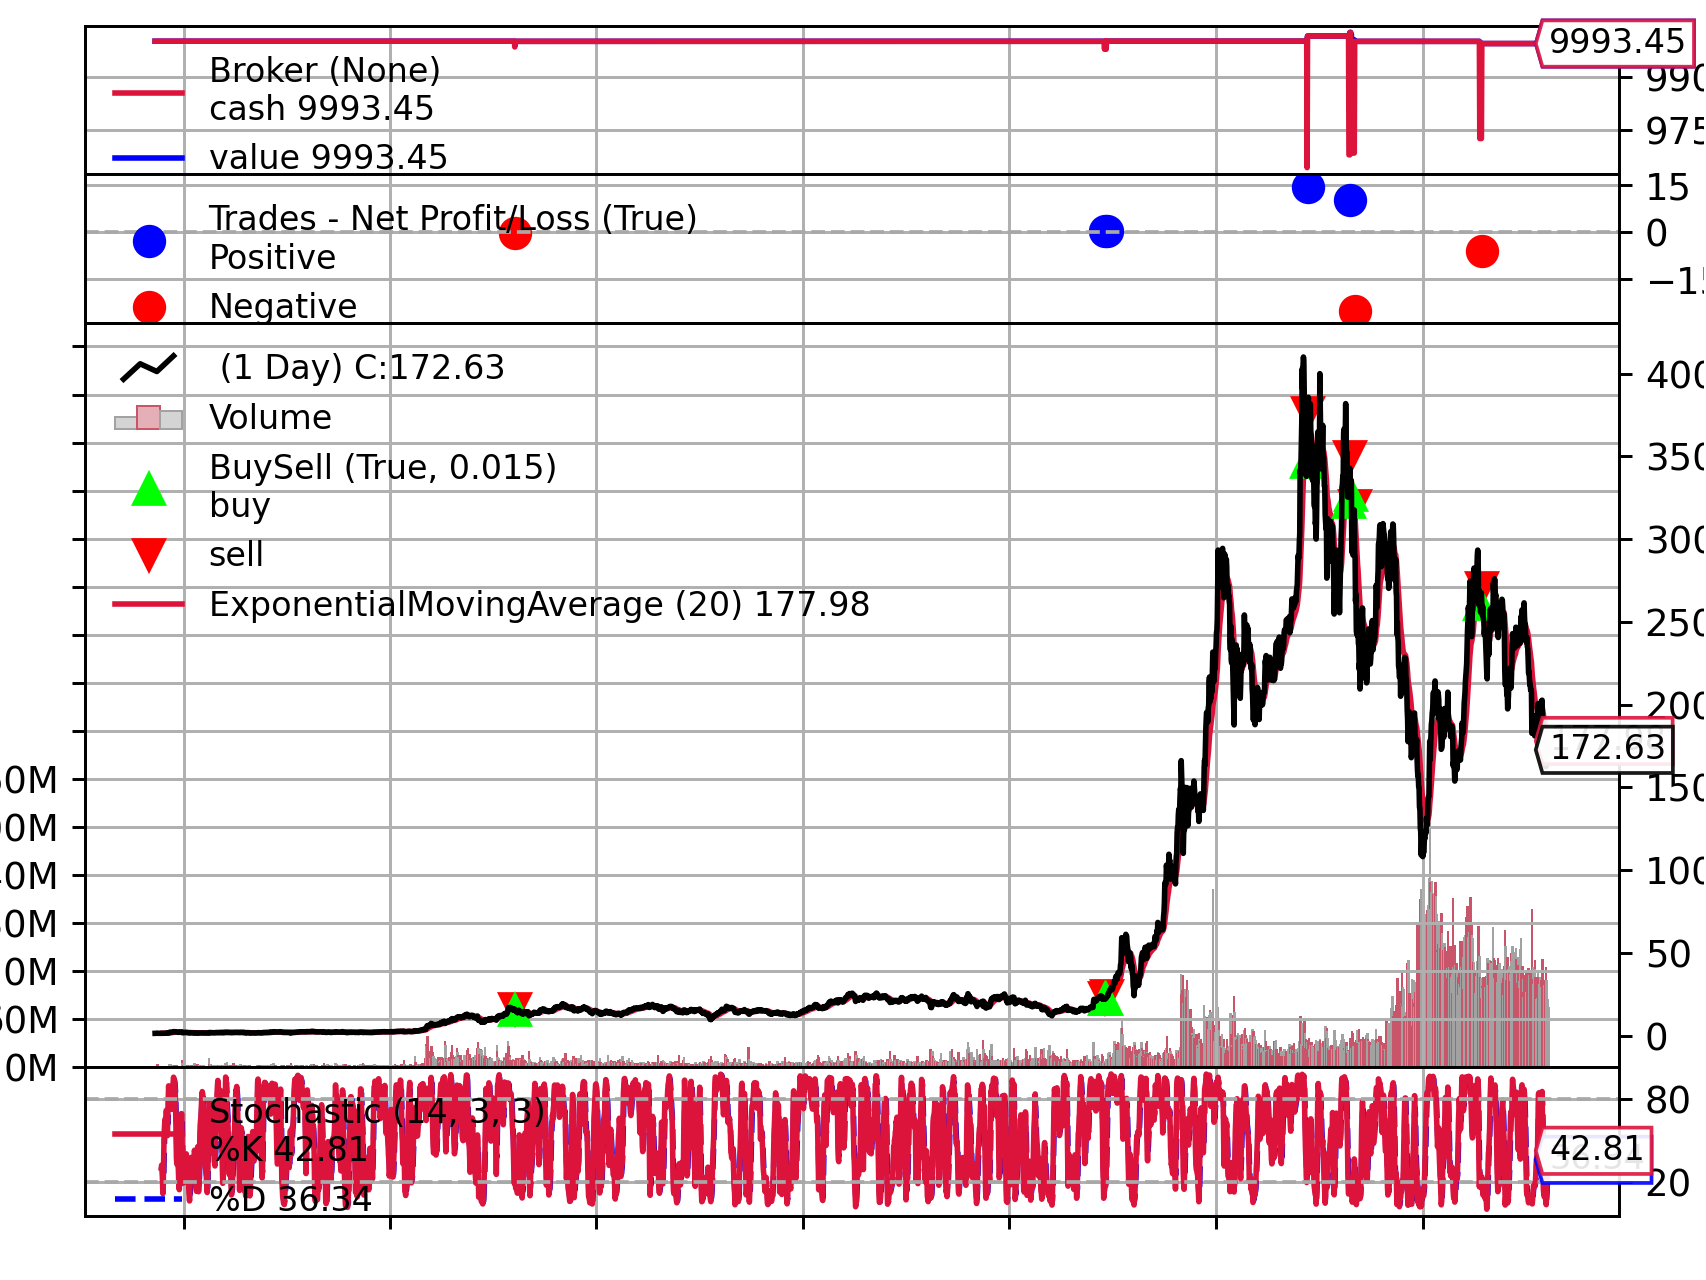

In [24]:
import backtrader as bt

class MyStrategy(bt.Strategy):
    params = (
        ('stoch_period', 14),
        ('stoch_oversold', 20),
        ('ema_period', 20),
    )

    def __init__(self):
        self.stoch = bt.indicators.Stochastic(self.data, period=self.params.stoch_period)
        self.ema = bt.indicators.ExponentialMovingAverage(self.data, period=self.params.ema_period)

    def next(self):
        if not self.position:  # If no open position
            if self.stoch.lines.percK[0] < self.params.stoch_oversold and self.data.close[0] > self.ema[0]:
                self.buy()

        elif self.data.close[0] > self.ema[0]:
            self.close()
            
            
    def stop(self):
        self.close()
        print('==================================================')
        print(f'Starting Value: {self.broker.startingcash:,.2f}')
        print(f'Ending   Value: {self.broker.getvalue():,.2f}')
        print('==================================================')

        
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add a data feed
    tesla_bt = bt.feeds.PandasData(dataname=tesla)
    cerebro.adddata(tesla_bt)
    cerebro.addstrategy(MyStrategy)

    cerebro.run()
    cerebro.plot()
